In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
dados = pd.read_csv('Healthcare-Diabetes.csv', sep =',')

In [32]:
dados.head()
dados.shape

(2768, 10)

In [33]:
dados = dados.drop(['Id'], axis = 1)

In [34]:
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
X1 = dados.drop(['Outcome'],axis = 1).values
y1 = dados.loc[:, 'Outcome'].values
y1

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [36]:
#Dividindo os dados em 2 conjuntos um com 80% dos dados para realizar o treinamento, e outro com 20% para teste

X_train, X_test, y_train,y_test = train_test_split(X1,y1, test_size = 0.2, random_state= 36)

In [40]:
#Deixando os dados padronizados

scaler = StandardScaler()
 = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Criando o modelo de Regressão logistica

modelo = LogisticRegression()

#Treinando o modelo
modelo.fit(X_train_scaled, y_train)

LogisticRegression()

In [49]:
# Criando as previsões

y_pred = modelo.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [51]:
#Avaliando o modelo

acuracia = accuracy_score(y_test, y_pred)
acuracia

0.7671480144404332

In [53]:
#Calculando a Matriz de Confusão

matriz_confu = confusion_matrix(y_test, y_pred)

#Gerando o relatorio  de classificação
classificacao = classification_report(y_test, y_pred)


In [54]:
print('Acuracia:', acuracia)
print('Matriz de Confusão:\n', matriz_confu)
print('Classificação: \n', classificacao)

Acuracia: 0.7671480144404332
Matriz de Confusão:
 [[306  31]
 [ 98 119]]
Classificação: 
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       337
           1       0.79      0.55      0.65       217

    accuracy                           0.77       554
   macro avg       0.78      0.73      0.74       554
weighted avg       0.77      0.77      0.76       554



In [55]:
# Calcular os acertos

tem_diabetes = (y_test == y_pred).sum()
nao_tem_diabetes =((y_test == 0) & (y_pred == 0)).sum()

total_tem_diabetes = (y_test == 1).sum()
total_nao_tem_diabetes = (y_test == 0).sum()

acertos_tem_diabetes = tem_diabetes / total_tem_diabetes
acertos_nao_tem_diabetes = nao_tem_diabetes / total_nao_tem_diabetes


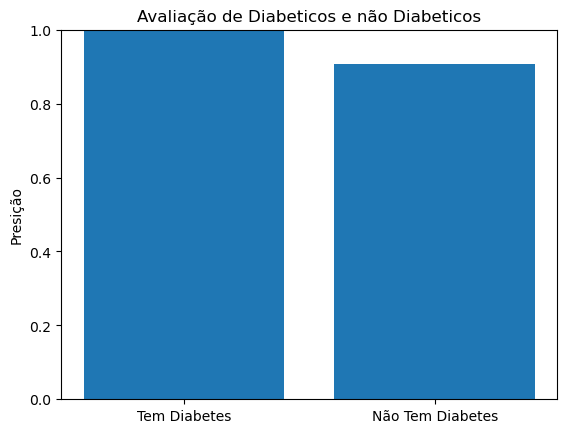

In [57]:
#Visuzalização dos resultados
labels = ['Tem Diabetes', 'Não Tem Diabetes']
presicao = [acertos_tem_diabetes, acertos_nao_tem_diabetes]
plt.bar(labels, presicao)
plt.ylabel('Presição')
plt.title('Avaliação de Diabeticos e não Diabeticos')
plt.ylim(0,1)
plt.show()

In [59]:
#Criando um DataFrame com os resultados atuais e os previstos

resultado_dt = pd.DataFrame({'Real': y_test, 'Previsao': y_pred})

#Count das ocorrencias

count = resultado_dt['Real'].value_counts()


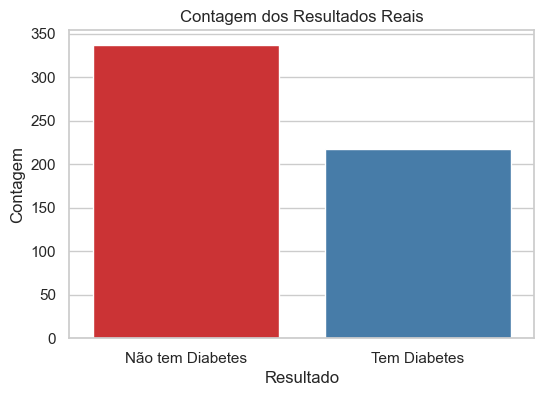

In [61]:
#Visualização das contagens dos resultados reais 
plt.figure(figsize=(6 ,4))
sns.set(style ='whitegrid')
sns.countplot(x = 'Real', data = resultado_dt, palette='Set1')
plt.title('Contagem dos Resultados Reais')
plt.xlabel('Resultado')
plt.ylabel('Contagem')
plt.xticks(ticks=[0,1], labels=['Não tem Diabetes', 'Tem Diabetes'])
plt.show()

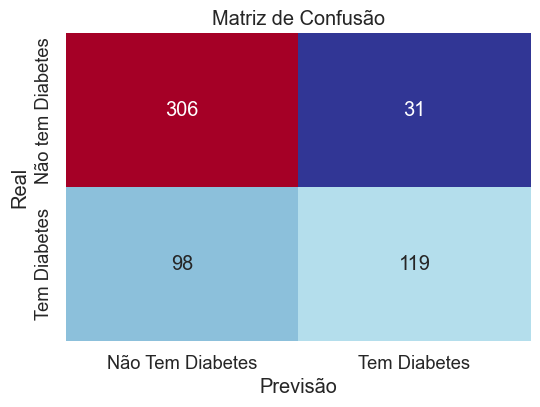

In [63]:
#Visualização da Matriz de Confusão

plt.figure(figsize=(6,4))
sns.set(font_scale = 1.2)
sns.heatmap(matriz_confu, annot = True, fmt = 'd', cmap ='RdYlBu_r', cbar = False, xticklabels=['Não Tem Diabetes', 'Tem Diabetes']
           , yticklabels=['Não tem Diabetes', 'Tem Diabetes'])

plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()